# Deep Learning Fundamentals Assignment 1

### Import packages and library

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Loading and initial processing of the dataset

In [2]:
# read the dataset by pandas
def parse_line(line):
    parts = line.strip().split()  # Split the line by whitespace
    label = int(parts[0])  # Extract the label (+1 or -1)
    features = {}  # Create a dictionary to store the features
    for part in parts[1:]:
        index, value = part.split(':')  # Split each feature by ':' into an index and a value
        features[int(index)] = float(value)  # Convert index and value to integers and floats
    return label, features

data_list = []
with open('datasets_binary_diabetes.txt', 'r') as file:
    for line in file:
        label, features = parse_line(line)
        data_list.append({'label': label, **features})

In [3]:
diabetes_df = pd.DataFrame(data_list)

In [4]:
# Define a list of new column names in the desired order
new_column_names = ["Label",
                        "Pregnancies",
                        "Glucose",
                        "BloodPressure",
                        "SkinThickness",
                        "Insulin",
                        "BMI",
                        "DiabetesPedigreeFunction",
                        "Age"]

# Assign the new column names to the DataFrame
diabetes_df.columns = new_column_names

In [5]:
# Change the Label column value classes
diabetes_df['Label'] = diabetes_df['Label'].replace({1: 0, -1: 1})

In [6]:
print(diabetes_df.head())

   Label  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0      1          6.0    148.0           72.0           35.0      0.0   
1      0          1.0     85.0           66.0           29.0      0.0   
2      1          8.0    183.0           64.0            0.0      0.0   
3      0          1.0     89.0           66.0           23.0     94.0   
4      1          0.0    137.0           40.0           35.0    168.0   

         BMI  DiabetesPedigreeFunction   Age  
0  33.599998                     0.627  50.0  
1  26.600000                     0.351  31.0  
2  23.299999                     0.672  32.0  
3  28.100000                     0.167  21.0  
4  43.099998                     2.288  33.0  


In [7]:
diabetes_df.isnull().sum()

Label                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [8]:
diabetes_df.describe()

,Label,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.348958,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,0.476951,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,0.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000
50%,0.000000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,1.000000,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000
max,1.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000


### Occurences of zero in the variables

In [9]:
# Assuming your DataFrame is named df
zero_counts = (diabetes_df == 0).sum()

# Display the counts of zeros in each column
print(zero_counts)

Label                       500
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### metadata

- It looks like there are nine columns in the dataset, which are as follows:
1. Pregnancies: Number of previous pregnancies
2. Glucose: Plasma glucose concentration
3. BloodPressure: Diastolic blood pressure
4. SkinThickness: Skin fold thickness measured from the triceps
5. Insulin : Blood serum insulin concentration
6. BMI: Body mass index
7. DiabetesPedigreeFunction: A summarized score that indicates the genetic
   predisposition of the patient for diabetes, as extrapolated from the patient's
   family record for diabetes
8. Age: Age in years
9. Outcome: The target variable we are trying to predict, 1 for patients that
    developed diabetes within five years of the initial measurement, and 0 otherwise

<Figure size 1296x576 with 0 Axes>

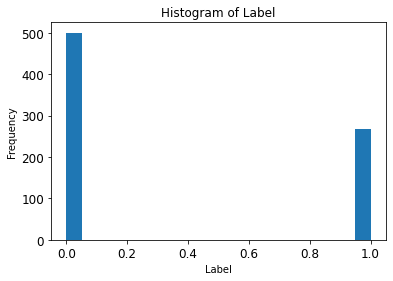

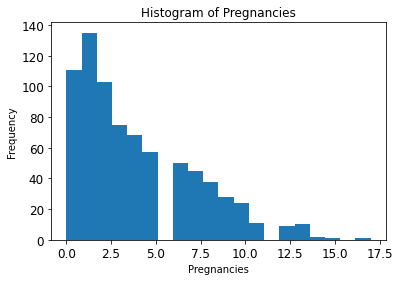

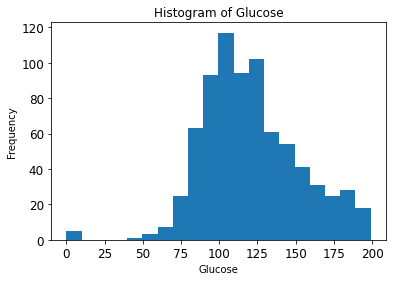

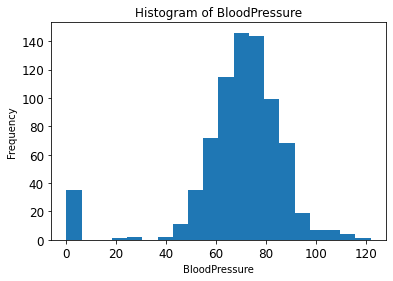

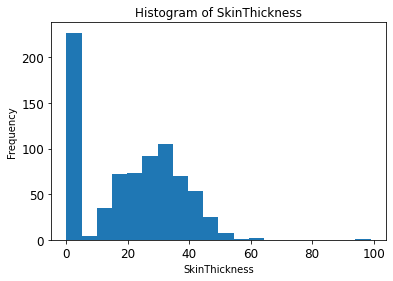

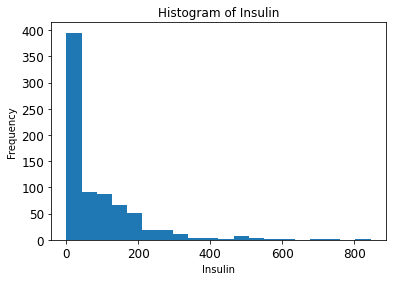

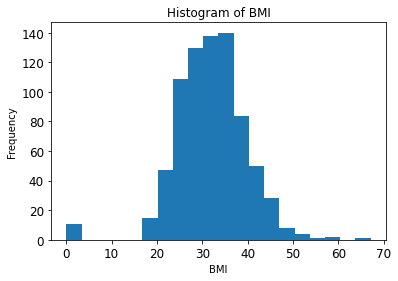

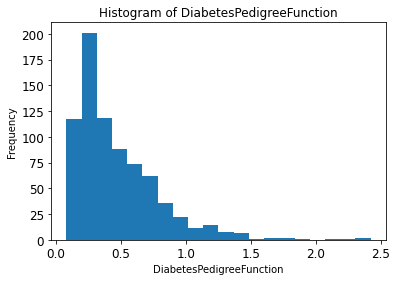

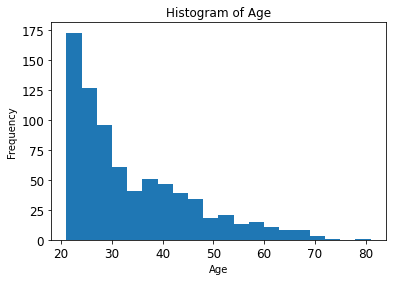

In [10]:
from matplotlib import pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 8))
# diabetes_df.hist()
# plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=10)
# plt.show()
for column in diabetes_df.columns:
    plt.figure(figsize=(6, 4))  # Set the size for each individual plot
    plt.hist(diabetes_df[column], bins=20)  # You can adjust the number of bins as needed
    plt.title(f"Histogram of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.show()

### Early insights:

- Age, we can see that most of the data was collected from young people, with the most
    common age group between 20-30 years old. 
- BMI,BloodPressure, and Glucose concentration is normally distributed 
- Extreme values. It appears that there are people with plasma Glucose concentration that is
  almost 200. On the opposite end of the distribution, we can see that 
- There are people with 0 values for BMI, BloodPressure, and Glucose.Are these missing values?
- Distribution for the number of previous Pregnancies, we can see some
  outliers as well. We can see that some patients had more than 15 previous pregnancies.

In [11]:
class_counts = diabetes_df['Label'].value_counts()
total_samples = len(diabetes_df)

proportions = class_counts / total_samples
print(proportions)

0    0.651042
1    0.348958
Name: Label, dtype: float64


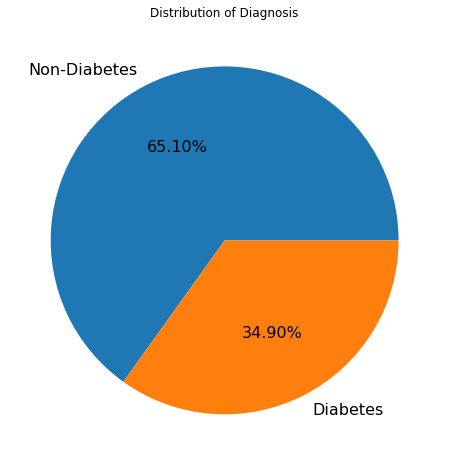

In [12]:
# Map label values to "Diabetes" and "Non-Diabetes"
diabetes_df_copy = diabetes_df.copy()
diabetes_df_copy['Label'] = diabetes_df_copy['Label'].map({1: 'Diabetes', 0: 'Non-Diabetes'})

plt.figure(figsize=(18, 8))
diabetes_label = diabetes_df_copy['Label'].value_counts(normalize=True)
plt.title("Distribution of Diagnosis")
plt.pie(diabetes_label, labels=diabetes_label.index, autopct="%.2f%%",textprops={'fontsize': 16})
plt.show()

It shows that approximately 65% of the population belongs to class 0 (no diabetes) and another 35% belongs to class 1 (diabetes)

Note that variables have different scales. Need to standardize before training the neural networks to avoide cause problem as variable with large scales tends to dominate over smaller scales.

We can also plot a density plot to investigate the relationship between each variable and the
target variable. To do so, we will use seaborn. seaborn is a Python data visualization library
based on matplotlib

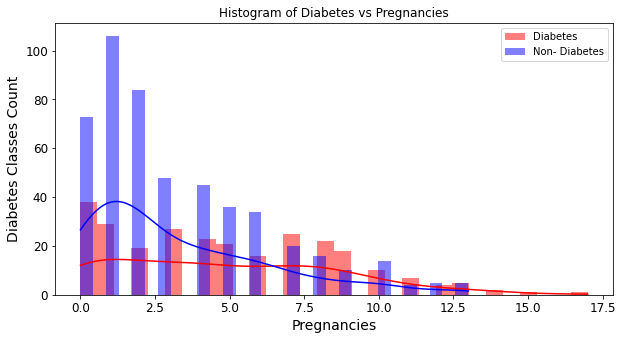

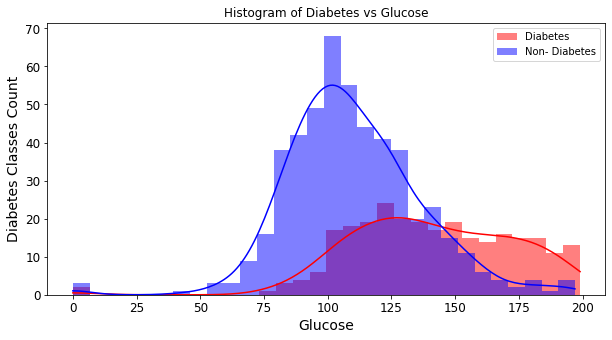

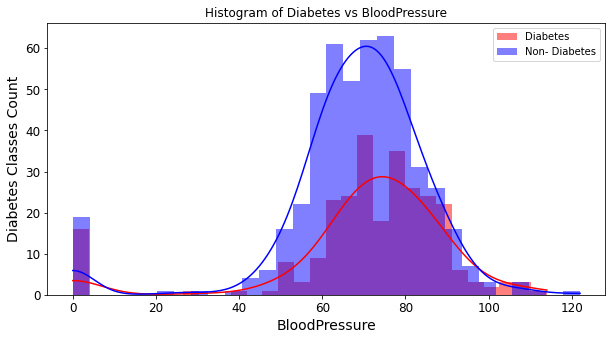

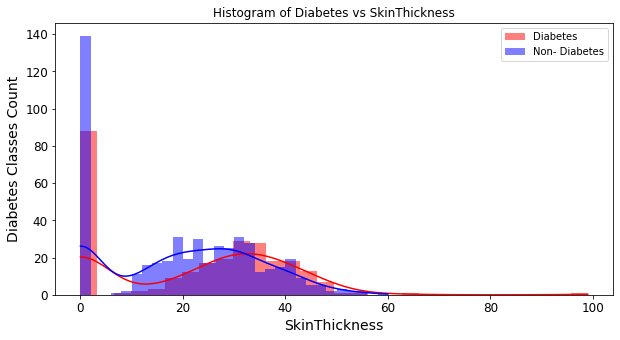

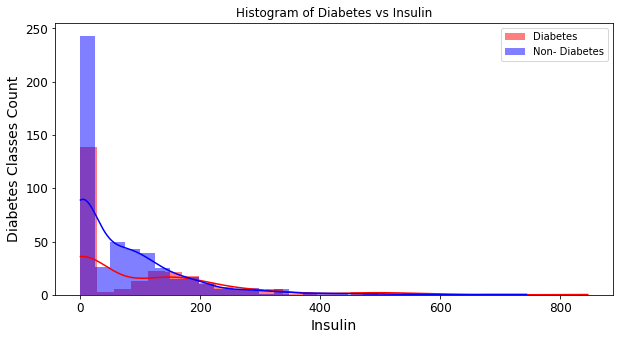

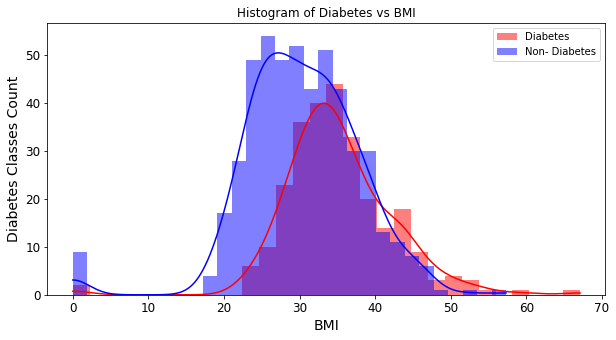

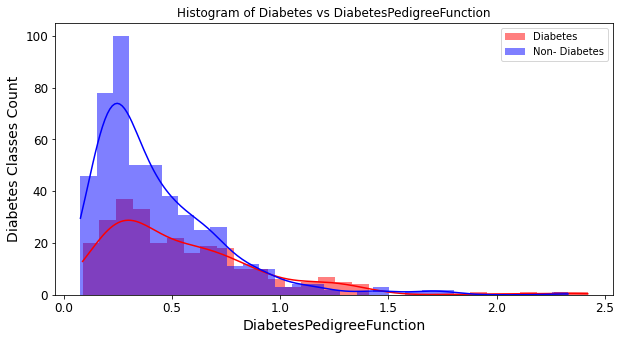

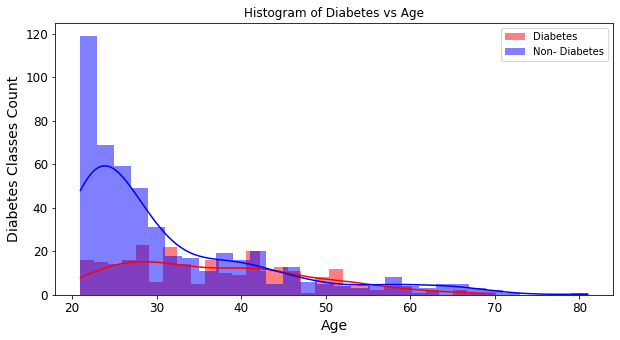

In [13]:
features = list(filter(lambda col: col != 'Label', diabetes_df.columns))

for i in features:
    plt.figure(figsize=(10, 5))
    plt.title(f"Histogram of Diabetes vs {i}")
    sns.histplot(data=diabetes_df[diabetes_df['Label'] == 1], x=i, bins=30, kde=True, edgecolor=None, label="Diabetes", color = 'red')
    sns.histplot(data=diabetes_df[diabetes_df['Label'] == 0], x=i, bins=30, kde=True, edgecolor=None, label="Non- Diabetes", color = 'blue')

    plt.xlabel(i)
    plt.ylabel("Diabetes Classes Count")

    # Add legend
    plt.legend()

    plt.show()


In other words, the <b>Glucose</b>, <b>BMI</b>, and <b>Age</b> variables are strong predictors for diabetes. People with
diabetes tend to have higher blood glucose level, higher BMI, and are older.

On the other hand, we can see that for variables such as BloodPressure and
SkinThickness, there is no significant difference in the distribution between diabetics and
non-diabetics. The two groups of people tend to have similar blood pressure and skin
thickness values. Therefore, BloodPressure and SkinThickness are poorer predictors
for diabetes

Text(0.5, 1.0, 'Confusion Matrix in the Pima Indian dataset')

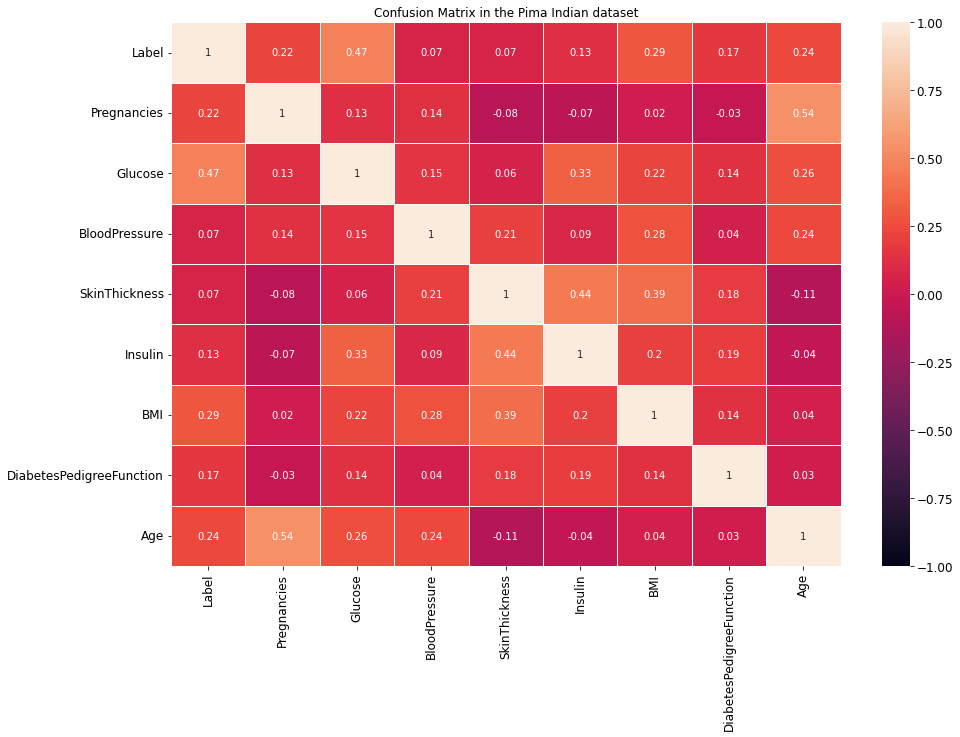

In [27]:
### Your code here
corr_matrix = diabetes_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix.round(2),vmin=-1, vmax=1, annot=True,linewidth=.5);
plt.title("Confusion Matrix in the Pima Indian dataset")

In [28]:
# Now we can see which features that is related to our responding variable -Label
abs(corr_matrix["Label"]).sort_values(ascending=False)

Label                       1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Label, dtype: float64

In [31]:
### Your code here
diabetes_temp = diabetes_df.copy()
# pre_pipeline.fit(diabetes_temp)
filled_zero_diabetes = pre_pipeline.fit_transform(diabetes_temp)

In [32]:
#checkin the Pipeline if it working on the dataset copy
filled_features_zero = pd.DataFrame(filled_zero_diabetes, columns=diabetes_temp.columns,index=diabetes_df.index)

zero_counts = (filled_features_zero == 0).sum()

# Display the counts of zeros in each column
print(zero_counts)

Label                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Text(0.5, 1.0, 'Confusion Matrix in the Pima Indian dataset')

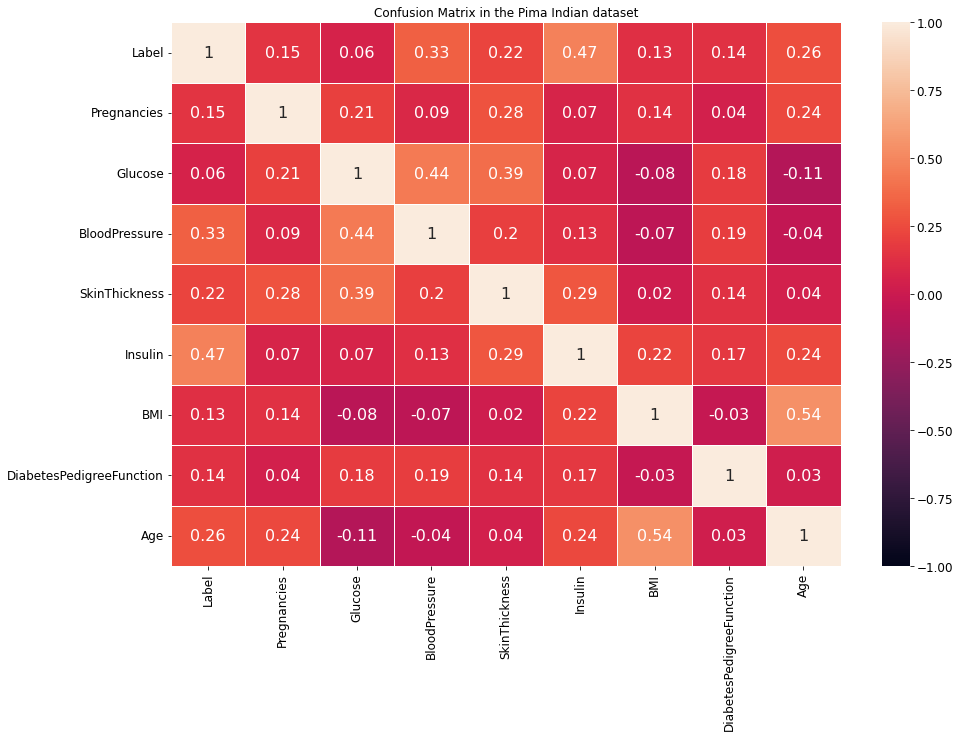

In [33]:
### Your code here
corr_matrix = filled_features_zero.corr()

plt.figure(figsize=(15,10))

# Increase font size for annotations
annot_kws = {"size": 16}

sns.heatmap(corr_matrix.round(2),vmin=-1, vmax=1, annot=True,linewidth=.5,annot_kws=annot_kws);
plt.title("Confusion Matrix in the Pima Indian dataset")

In [35]:
# Now we can see which features that is related to our responding variable - Label
corr_matrix["Label"].sort_values(ascending=False)

Label                       1.000000
Insulin                     0.466581
BloodPressure               0.331357
Age                         0.263514
SkinThickness               0.221071
Pregnancies                 0.152590
DiabetesPedigreeFunction    0.137337
BMI                         0.129459
Glucose                     0.057328
Name: Label, dtype: float64

### Feature selection
All predictor variables except **'BloodPressure', 'SkinThickness'**

In [36]:
# diabetes_df = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
#        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Label']]

diabetes_df = diabetes_df[['Pregnancies', 'Glucose',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Label']]
# change the data to numpy array
diabetes_array = diabetes_df.values

In [37]:
# Your code here
from sklearn.model_selection import train_test_split

bigtrain_set, test_set = train_test_split(diabetes_array, test_size=0.2, random_state=101, stratify=diabetes_array[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.25, random_state=101, stratify=bigtrain_set[:,-1])

In [38]:
#Get the X and y for train, val and test
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(460, 6), (460,), (154, 6), (154,), (154, 6), (154,)]


### Data Preprocessing

#### Handling missing values and impute value for 0 with median
**Build a pre-processing pipeline** that includes imputation (as even though we don't strictly need it here it is a good habit to always include it) and other appropriate pre-processing. 

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the imputer with fill_value=0
imputer = SimpleImputer(strategy="median", fill_value=0)

# Create the preprocessing pipeline
pre_pipeline = Pipeline([
    ("impute", imputer),
    ("standardize", StandardScaler())
])

In [40]:
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

Case 3 - Predicting all samples as random:
Balanced Accuracy: 0.5279166666666667
Recall: 0.5625
Precision: 0.371900826446281
AUC: 0.5279166666666666
F1 Score: 0.4477611940298507
F-beta Score (beta=0.1): 0.37315270935960587
F-beta Score (beta=10): 0.5596601403768008


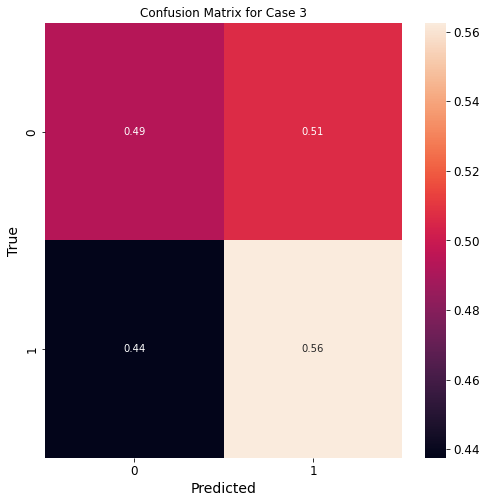

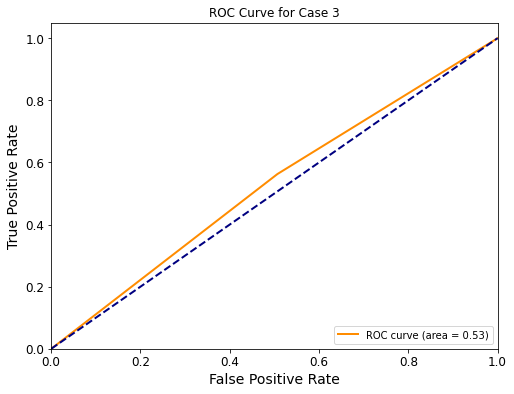

In [41]:
### Baseline Accuracy using random simpling in the target variable.
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


# Case 3 - predicting all samples to be random
np.random.seed(101)
predictions_case3 = np.random.choice([0, 1], size=len(y_train))
metrics_case3 = {
    'Balanced Accuracy': metrics.balanced_accuracy_score(y_train, predictions_case3),
    'Recall': metrics.recall_score(y_train, predictions_case3),
    'Precision': metrics.precision_score(y_train, predictions_case3),
    'AUC': metrics.roc_auc_score(y_train, predictions_case3),
    'F1 Score': metrics.f1_score(y_train, predictions_case3),
    'F-beta Score (beta=0.1)': f01_score(y_train,predictions_case3),
    'F-beta Score (beta=10)': f10_score(y_train, predictions_case3)
}

print("Case 3 - Predicting all samples as random:")
for metric, value in metrics_case3.items():
    print(f"{metric}: {value}")
    
cmat = confusion_matrix(y_true=y_train, y_pred=predictions_case3,normalize = 'true')
plt.figure(figsize=(8,8))
sns.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Case 3')
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_train, predictions_case3)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Case 3')
plt.legend(loc='lower right')
plt.show()

Using the random sampling is a common baseline approach to assess the compatibality of the model. We can see the accuracy is 0.548 using random sampling method. Base on the ROC curve, If you're randomly predicting the class labels with no regard for the data, the ROC curve will indeed resemble a random diagonal line (the ROC curve of a random classifier).This is expected because random predictions are essentially like flipping a coin,
Using Perceptron model, it  should aim to achieve an accuracy significantly better than this baseline to be considered useful.

In [44]:
# Temporary version of the dataset to see if the pre-pipeline works or not.

diabetes_array_temp = pd.DataFrame(diabetes_array,columns=diabetes_df.columns)
pre_pipeline.fit(diabetes_array_temp)
filled_diabetes = pre_pipeline.transform(diabetes_array_temp)
filled_diabetes[1]

array([-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
       -0.19067191, -0.73212021])

In [42]:
# Original Dataframe.
# In the Early insight,there are patients with 0 values for BMI, BloodPressure, and Glucose.Are these missing values?
diabetes_df.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.299999,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.599998,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.099998,2.420000,81.000000,1.000000


In [45]:
import numpy as np

# Assuming diabetes_array is your 2D NumPy array with 8 columns
# Calculate basic statistics for each column
mean_values = np.mean(filled_diabetes, axis=0)  # Calculate means along axis 0 (columns)
median_values = np.median(filled_diabetes, axis=0)  # Calculate medians along axis 0
std_dev_values = np.std(filled_diabetes, axis=0)  # Calculate standard deviations along axis 0
min_values = np.min(filled_diabetes, axis=0)  # Calculate minimum values along axis 0
max_values = np.max(filled_diabetes, axis=0)  # Calculate maximum values along axis 0

# Print the statistics for each column
for i in range(filled_diabetes.shape[1]):
    print(f"Column {i + 1}:")
    print("Mean:", mean_values[i])
    print("Median:", median_values[i])
    print("Standard Deviation:", std_dev_values[i])
    print("Min Value:", min_values[i])
    print("Max Value:", max_values[i])
    print()

Column 1:
Mean: -6.47630097698008e-17
Median: -0.2509521280020695
Standard Deviation: 1.0
Min Value: -1.1418515161634994
Max Value: 3.906578350084603

Column 2:
Mean: -9.25185853854297e-18
Median: -0.12188771051207764
Standard Deviation: 1.0
Min Value: -3.78365371377963
Max Value: 2.4444782063079162

Column 3:
Mean: -3.0068540250264654e-17
Median: -0.4280622466509642
Standard Deviation: 0.9999999999999998
Min Value: -0.6928905722954675
Max Value: 6.65283937836846

Column 4:
Mean: 1.7115938296304497e-16
Median: 0.0009419771252787703
Standard Deviation: 1.0
Min Value: -4.06047389041959
Max Value: 4.4558072530000645

Column 5:
Mean: 2.4517425127138875e-16
Median: -0.3001282260084456
Standard Deviation: 0.9999999999999999
Min Value: -1.1895531764897842
Max Value: 5.88356476587794

Column 6:
Mean: 1.9313254699208451e-16
Median: -0.3608474114058894
Standard Deviation: 1.0
Min Value: -1.0415494364835023
Max Value: 4.063715751598595

Column 7:
Mean: 7.401486830834377e-17
Median: -0.73212020870

# Initial model successfully trained (and acting as a baseline)

We will use a conservative configuration for the adam optimizer with a learning rate of 0.001. The binary cross-entropy loss function will be optimized, suitable for binary classification, and we will monitor the classification accuracy metric.

### Create and define the model

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras.optimizers import Adam
from keras.optimizers import SGD

# Create a model
model = keras.models.Sequential() 
model.add(Dense(units=8, activation='relu',input_dim=6))
model.add(Dense(units=2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss ="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [50]:
# We can check a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 56        
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


### Fitting the model

In [51]:
# Convert NumPy arrays back to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=diabetes_df.columns[:-1]) 
X_val = pd.DataFrame(X_val, columns=diabetes_df.columns[:-1])
X_test = pd.DataFrame(X_test, columns=diabetes_df.columns[:-1])

# Preprocess the training, validation, and test sets
X_train = pre_pipeline.fit_transform(X_train)
X_val = pre_pipeline.transform(X_val)
X_test = pre_pipeline.transform(X_test)

# Now train (fit) the model, specifying appropriate data and number of epochs (small here to save time)
# Save the history of metrics versus epochs - *always* keep this
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), batch_size=16)

Epoch 1/200
29/29 [==============================] - 1s 7ms/step - loss: 0.6889 - accuracy: 0.6870 - val_loss: 0.6846 - val_accuracy: 0.6818
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.6913 - val_loss: 0.6778 - val_accuracy: 0.6948
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.7065 - val_loss: 0.6633 - val_accuracy: 0.6948
Epoch 4/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.7130 - val_loss: 0.6332 - val_accuracy: 0.6883
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.7261 - val_loss: 0.6027 - val_accuracy: 0.6818
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.7304 - val_loss: 0.5808 - val_accuracy: 0.6883
Epoch 7/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7283 - val_loss: 0.5625 - val_accuracy: 0.7013
Epoch 8/200
2

Epoch 59/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7891 - val_loss: 0.4684 - val_accuracy: 0.7532
Epoch 60/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7870 - val_loss: 0.4684 - val_accuracy: 0.7532
Epoch 61/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7891 - val_loss: 0.4675 - val_accuracy: 0.7532
Epoch 62/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7870 - val_loss: 0.4667 - val_accuracy: 0.7532
Epoch 63/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7891 - val_loss: 0.4664 - val_accuracy: 0.7532
Epoch 64/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7913 - val_loss: 0.4652 - val_accuracy: 0.7597
Epoch 65/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7891 - val_loss: 0.4651 - val_accuracy: 0.7597
Epoch 

29/29 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.7891 - val_loss: 0.4631 - val_accuracy: 0.7662
Epoch 117/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.7826 - val_loss: 0.4628 - val_accuracy: 0.7597
Epoch 118/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.7804 - val_loss: 0.4632 - val_accuracy: 0.7597
Epoch 119/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.7848 - val_loss: 0.4643 - val_accuracy: 0.7597
Epoch 120/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.7848 - val_loss: 0.4641 - val_accuracy: 0.7597
Epoch 121/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.7891 - val_loss: 0.4638 - val_accuracy: 0.7597
Epoch 122/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.7826 - val_loss: 0.4637 - val_accuracy: 0.7532
Epoch 123/200

29/29 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8022 - val_loss: 0.4687 - val_accuracy: 0.7532
Epoch 174/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8000 - val_loss: 0.4689 - val_accuracy: 0.7597
Epoch 175/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.7978 - val_loss: 0.4690 - val_accuracy: 0.7662
Epoch 176/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.7957 - val_loss: 0.4689 - val_accuracy: 0.7532
Epoch 177/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8022 - val_loss: 0.4692 - val_accuracy: 0.7532
Epoch 178/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.7891 - val_loss: 0.4702 - val_accuracy: 0.7662
Epoch 179/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.7978 - val_loss: 0.4692 - val_accuracy: 0.7727
Epoch 180/200

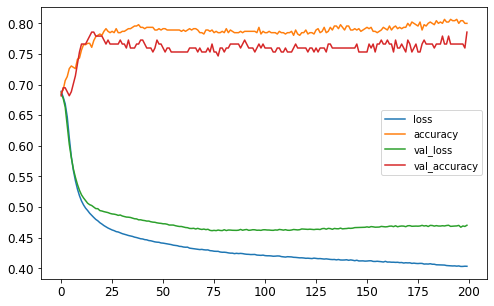

In [52]:
# Simple way to plot the history information (see later for more detail)
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

### Evaluating the baseline model

In [53]:
# Now run the model on the test set and get results (loss and accuracy both reported)
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}, Baseline model accuracy: {test_accuracy}")

Test loss: 0.5460342168807983, Baseline model accuracy: 0.7402597665786743


In [54]:
print(f"Baseline model has the accuracy of: {round(test_accuracy,4)*100}%")

Baseline model has the accuracy of: 74.03%


5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       100
         1.0       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



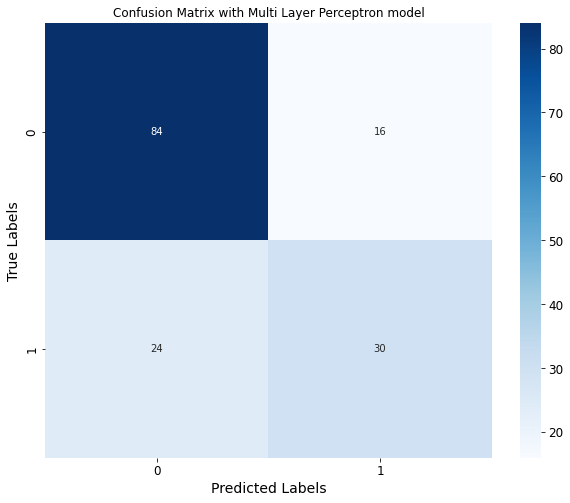

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns

# Predict on the test dataset
y_pred = model.predict(X_test)


# Define your custom threshold (e.g., 0.6)
custom_threshold = 0.5

# Convert predicted probabilities to class labels using the custom threshold
y_test_pred = np.where(y_pred >= custom_threshold, 1, 0)

print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Multi Layer Perceptron model")
plt.show()

# Multi Layer Perceptron tuning the learning rate and optimizer

Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 0.7571 - accuracy: 0.5109 - val_loss: 0.6625 - val_accuracy: 0.6494
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6978 - val_loss: 0.6481 - val_accuracy: 0.6494
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5956 - accuracy: 0.7391 - val_loss: 0.6306 - val_accuracy: 0.6494
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7739 - val_loss: 0.6174 - val_accuracy: 0.6623
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5369 - accuracy: 0.7804 - val_loss: 0.5885 - val_accuracy: 0.6948
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7848 - val_loss: 0.5919 - val_accuracy: 0.6948
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7783 - val_loss: 0.5665 - val_accuracy: 0.6818
Epoch 8/50
15/15 [=

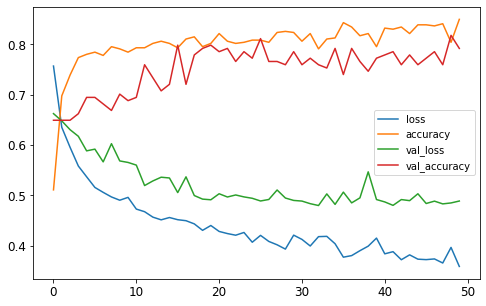

Epoch 1/50
15/15 [==============================] - 1s 10ms/step - loss: 0.5826 - accuracy: 0.6870 - val_loss: 0.5120 - val_accuracy: 0.7597
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.7370 - val_loss: 0.4425 - val_accuracy: 0.7662
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.7674 - val_loss: 0.4677 - val_accuracy: 0.7662
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7696 - val_loss: 0.4369 - val_accuracy: 0.7857
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5003 - accuracy: 0.6761 - val_loss: 0.4951 - val_accuracy: 0.7468
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4981 - accuracy: 0.7413 - val_loss: 0.4750 - val_accuracy: 0.7792
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7891 - val_loss: 0.4507 - val_accuracy: 0.7597
Epoch 8/50
15/15 [=

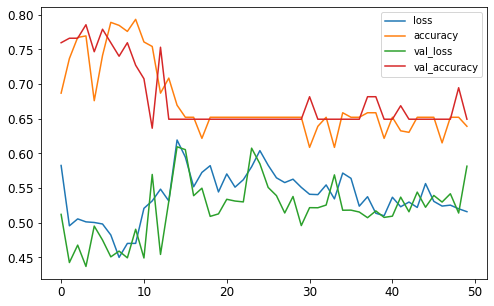

Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 0.7195 - accuracy: 0.6130 - val_loss: 0.5303 - val_accuracy: 0.6494
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5559 - accuracy: 0.7217 - val_loss: 0.5177 - val_accuracy: 0.7403
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.7543 - val_loss: 0.4680 - val_accuracy: 0.7468
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7152 - val_loss: 0.5106 - val_accuracy: 0.7208
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.7457 - val_loss: 0.5784 - val_accuracy: 0.6883
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7283 - val_loss: 0.4952 - val_accuracy: 0.7143
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5164 - accuracy: 0.7783 - val_loss: 0.4966 - val_accuracy: 0.7208
Epoch 8/50
15/15 [=

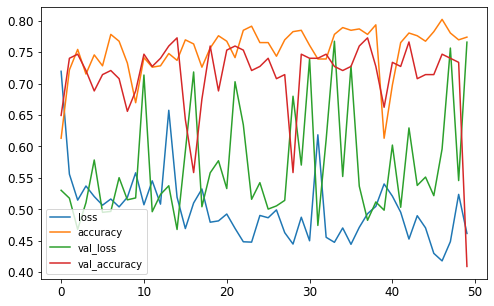

Epoch 1/50
15/15 [==============================] - 2s 11ms/step - loss: 0.5578 - accuracy: 0.7348 - val_loss: 0.5422 - val_accuracy: 0.6688
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7717 - val_loss: 0.5931 - val_accuracy: 0.6818
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.7674 - val_loss: 0.4855 - val_accuracy: 0.7338
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7717 - val_loss: 0.4846 - val_accuracy: 0.7273
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.7935 - val_loss: 0.5984 - val_accuracy: 0.7273
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.7826 - val_loss: 0.5594 - val_accuracy: 0.7338
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7891 - val_loss: 0.5242 - val_accuracy: 0.6948
Epoch 8/50
15/15 [=

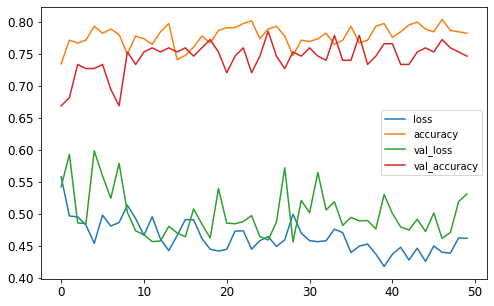

Epoch 1/50
15/15 [==============================] - 1s 10ms/step - loss: 0.7201 - accuracy: 0.3935 - val_loss: 0.6860 - val_accuracy: 0.6494
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.4826 - val_loss: 0.6801 - val_accuracy: 0.6948
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5348 - val_loss: 0.6748 - val_accuracy: 0.6883
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.6065 - val_loss: 0.6702 - val_accuracy: 0.6818
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.6609 - val_loss: 0.6659 - val_accuracy: 0.6558
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6891 - val_loss: 0.6621 - val_accuracy: 0.6688
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.7065 - val_loss: 0.6586 - val_accuracy: 0.6688
Epoch 8/50
15/15 [=

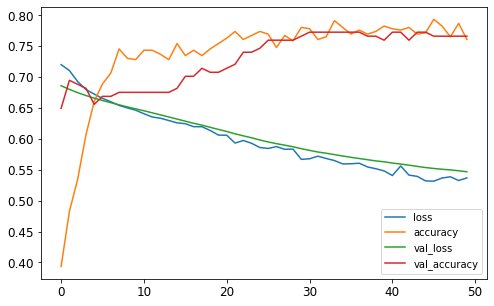

Epoch 1/50
15/15 [==============================] - 1s 10ms/step - loss: 0.6129 - accuracy: 0.6587 - val_loss: 0.5778 - val_accuracy: 0.6558
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.6826 - val_loss: 0.5214 - val_accuracy: 0.7532
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7717 - val_loss: 0.5071 - val_accuracy: 0.7532
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7978 - val_loss: 0.4905 - val_accuracy: 0.7532
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.7935 - val_loss: 0.4811 - val_accuracy: 0.7468
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.7957 - val_loss: 0.4848 - val_accuracy: 0.7662
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8065 - val_loss: 0.4738 - val_accuracy: 0.7532
Epoch 8/50
15/15 [=

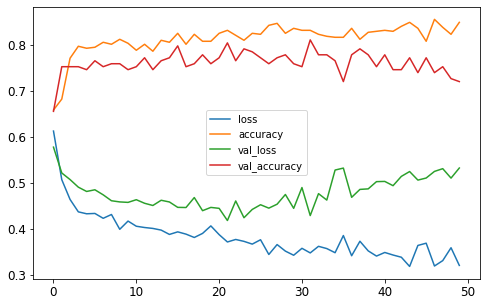

Epoch 1/50
15/15 [==============================] - 1s 10ms/step - loss: 0.5600 - accuracy: 0.7283 - val_loss: 0.5382 - val_accuracy: 0.7727
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7783 - val_loss: 0.5387 - val_accuracy: 0.7208
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7522 - val_loss: 0.5291 - val_accuracy: 0.6948
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7826 - val_loss: 0.4960 - val_accuracy: 0.7727
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.7826 - val_loss: 0.4952 - val_accuracy: 0.7532
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.7913 - val_loss: 0.5112 - val_accuracy: 0.7273
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.7978 - val_loss: 0.4955 - val_accuracy: 0.7403
Epoch 8/50
15/15 [=

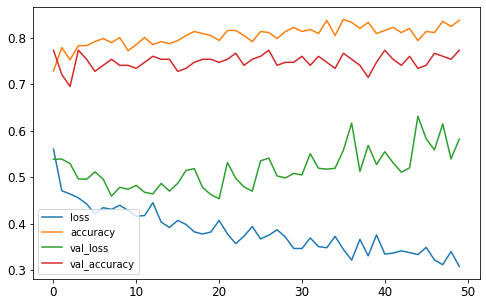

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 0.8041 - accuracy: 0.5413 - val_loss: 0.6785 - val_accuracy: 0.6299
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6388 - accuracy: 0.7674 - val_loss: 0.6581 - val_accuracy: 0.6753
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.7848 - val_loss: 0.6385 - val_accuracy: 0.7013
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.7957 - val_loss: 0.6257 - val_accuracy: 0.7078
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7935 - val_loss: 0.6152 - val_accuracy: 0.6883
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7935 - val_loss: 0.5990 - val_accuracy: 0.7013
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.8022 - val_loss: 0.5938 - val_accuracy: 0.7013
Epoch 8/50
15/15 [=

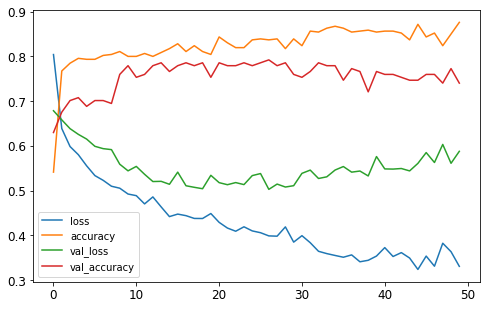

Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 0.6864 - accuracy: 0.6522 - val_loss: 0.6857 - val_accuracy: 0.6494
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6522 - val_loss: 0.6845 - val_accuracy: 0.6494
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.6522 - val_loss: 0.6832 - val_accuracy: 0.6494
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.6522 - val_loss: 0.6819 - val_accuracy: 0.6494
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.6522 - val_loss: 0.6807 - val_accuracy: 0.6494
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6522 - val_loss: 0.6795 - val_accuracy: 0.6494
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6522 - val_loss: 0.6783 - val_accuracy: 0.6494
Epoch 8/50
15/15 [=

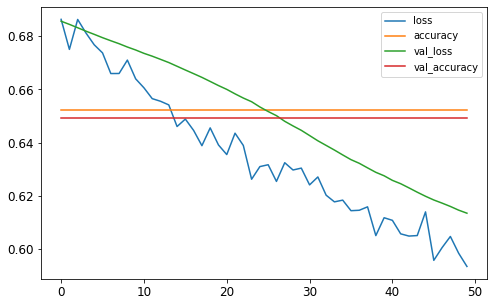

Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 0.7055 - accuracy: 0.5935 - val_loss: 0.6904 - val_accuracy: 0.6558
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.6391 - val_loss: 0.6883 - val_accuracy: 0.6558
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.6457 - val_loss: 0.6862 - val_accuracy: 0.6558
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.6674 - val_loss: 0.6840 - val_accuracy: 0.6688
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.6739 - val_loss: 0.6811 - val_accuracy: 0.6623
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6891 - val_loss: 0.6770 - val_accuracy: 0.6753
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.7043 - val_loss: 0.6662 - val_accuracy: 0.6883
Epoch 8/50
15/15 [=

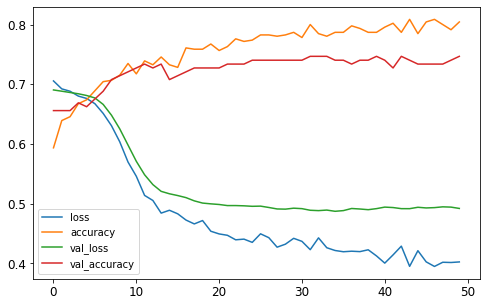

Epoch 1/50
15/15 [==============================] - 1s 12ms/step - loss: 0.7100 - accuracy: 0.5348 - val_loss: 0.6949 - val_accuracy: 0.5844
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.6109 - val_loss: 0.6907 - val_accuracy: 0.6299
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.6500 - val_loss: 0.6872 - val_accuracy: 0.6558
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.6870 - val_loss: 0.6836 - val_accuracy: 0.6623
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6870 - val_loss: 0.6753 - val_accuracy: 0.6623
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6935 - val_loss: 0.6611 - val_accuracy: 0.6753
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.7087 - val_loss: 0.6345 - val_accuracy: 0.6818
Epoch 8/50
15/15 [=

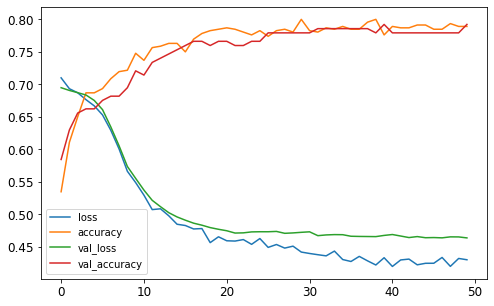

Epoch 1/50
15/15 [==============================] - 1s 10ms/step - loss: 0.7853 - accuracy: 0.3565 - val_loss: 0.7002 - val_accuracy: 0.5260
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7426 - accuracy: 0.4739 - val_loss: 0.6907 - val_accuracy: 0.6623
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.6261 - val_loss: 0.6854 - val_accuracy: 0.6623
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.6478 - val_loss: 0.6825 - val_accuracy: 0.6753
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.6652 - val_loss: 0.6801 - val_accuracy: 0.6753
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6957 - val_loss: 0.6774 - val_accuracy: 0.6883
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6935 - val_loss: 0.6745 - val_accuracy: 0.6883
Epoch 8/50
15/15 [=

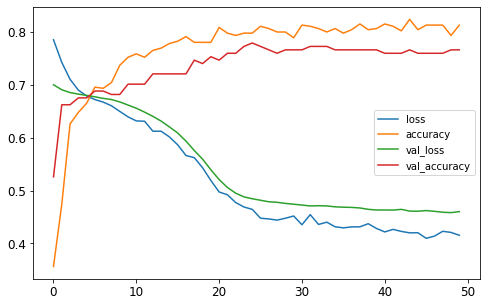

Epoch 1/50
15/15 [==============================] - 1s 11ms/step - loss: 1.0026 - accuracy: 0.3870 - val_loss: 0.7450 - val_accuracy: 0.2922
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9985 - accuracy: 0.3717 - val_loss: 0.7484 - val_accuracy: 0.3052
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.9985 - accuracy: 0.3739 - val_loss: 0.7528 - val_accuracy: 0.2922
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9860 - accuracy: 0.3739 - val_loss: 0.7583 - val_accuracy: 0.3312
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9970 - accuracy: 0.3870 - val_loss: 0.7646 - val_accuracy: 0.3247
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.3891 - val_loss: 0.7713 - val_accuracy: 0.3312
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.9931 - accuracy: 0.3978 - val_loss: 0.7787 - val_accuracy: 0.3377
Epoch 8/50
15/15 [=

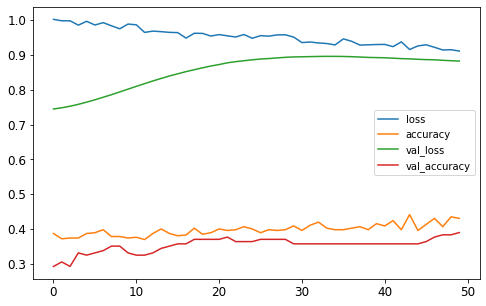

Epoch 1/50
15/15 [==============================] - 1s 10ms/step - loss: 0.8109 - accuracy: 0.6478 - val_loss: 0.6812 - val_accuracy: 0.6494
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7835 - accuracy: 0.6457 - val_loss: 0.6810 - val_accuracy: 0.6494
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.6565 - val_loss: 0.6803 - val_accuracy: 0.6494
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.6457 - val_loss: 0.6793 - val_accuracy: 0.6494
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7473 - accuracy: 0.6522 - val_loss: 0.6778 - val_accuracy: 0.6494
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.6522 - val_loss: 0.6758 - val_accuracy: 0.6494
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.6522 - val_loss: 0.6734 - val_accuracy: 0.6494
Epoch 8/50
15/15 [=

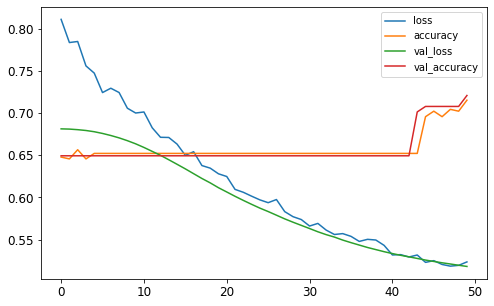

Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 0.8995 - accuracy: 0.4196 - val_loss: 0.7444 - val_accuracy: 0.4610
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.4391 - val_loss: 0.7413 - val_accuracy: 0.4870
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8653 - accuracy: 0.4348 - val_loss: 0.7395 - val_accuracy: 0.5065
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8474 - accuracy: 0.4630 - val_loss: 0.7375 - val_accuracy: 0.5325
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.4522 - val_loss: 0.7363 - val_accuracy: 0.5390
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.4413 - val_loss: 0.7351 - val_accuracy: 0.5130
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.4652 - val_loss: 0.7346 - val_accuracy: 0.5455
Epoch 8/50
15/15 [=

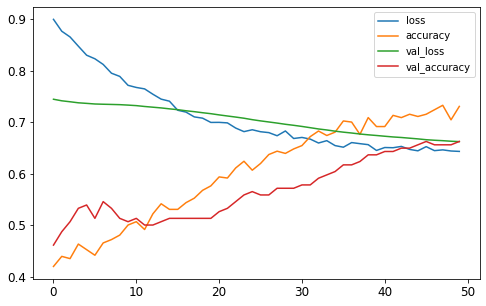

Epoch 1/50
15/15 [==============================] - 2s 14ms/step - loss: 0.7008 - accuracy: 0.4783 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5261 - val_loss: 0.6940 - val_accuracy: 0.5065
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5261 - val_loss: 0.6936 - val_accuracy: 0.5325
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5348 - val_loss: 0.6932 - val_accuracy: 0.5390
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5413 - val_loss: 0.6928 - val_accuracy: 0.5714
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5739 - val_loss: 0.6925 - val_accuracy: 0.5909
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5848 - val_loss: 0.6922 - val_accuracy: 0.6104
Epoch 8/50
15/15 [=

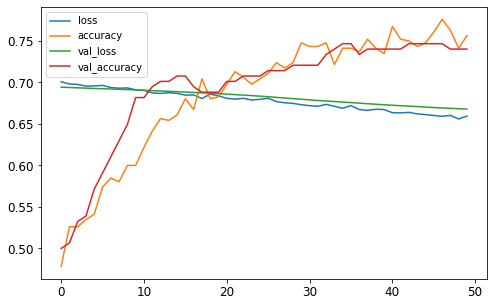

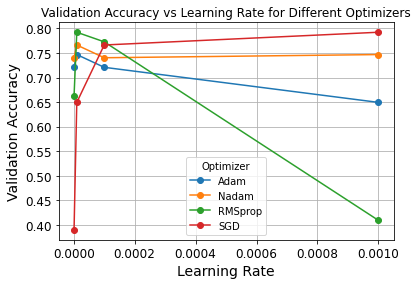

[['SGD', 0.001, 0.7922077775001526], ['Adam', 0.001, 0.649350643157959], ['RMSprop', 0.001, 0.40909090638160706], ['Nadam', 0.001, 0.7467532753944397], ['SGD', 0.0001, 0.7662337422370911], ['Adam', 0.0001, 0.7207792401313782], ['RMSprop', 0.0001, 0.7727272510528564], ['Nadam', 0.0001, 0.7402597665786743], ['SGD', 1e-05, 0.649350643157959], ['Adam', 1e-05, 0.7467532753944397], ['RMSprop', 1e-05, 0.7922077775001526], ['Nadam', 1e-05, 0.7662337422370911], ['SGD', 1.0000000000000002e-06, 0.3896103799343109], ['Adam', 1.0000000000000002e-06, 0.7207792401313782], ['RMSprop', 1.0000000000000002e-06, 0.6623376607894897], ['Nadam', 1.0000000000000002e-06, 0.7402597665786743]]


In [126]:
# Define the number and size of hidden layers
hiddensizes = [8,2] # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn = "relu"
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 50
learningrate = 0.01  # SGD default value

def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32,input_shape=(6,),activation = actfn))
    model.add(keras.layers.BatchNormalization())
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation=actfn))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

def train_model_with_learning_rate_optimizer(X_train, y_train, X_val, y_val, optimizer, learning_rate):
    model = model_dense_factory(hiddensizes, actfn, optimizer, learning_rate)
    history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), batch_size=batch_size)
    return history

def plot_learning_rate_optimizer_results(res):
    df = pd.DataFrame(res, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy'])
    pivot_df = df.pivot_table(values='Validation Accuracy', index='Learning Rate', columns='Optimizer')
    pivot_df.plot(marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy vs Learning Rate for Different Optimizers')
    plt.grid()
    plt.legend(title='Optimizer')
    plt.show()

learning_rates = [0.1, 0.01, 0.001, 0.0001]
optimizer_setup = [
    [keras.optimizers.SGD, 'SGD'],
    [keras.optimizers.Adam, 'Adam'],
    [keras.optimizers.RMSprop, 'RMSprop'],
    [keras.optimizers.Nadam, 'Nadam']
]

res = []

for lr in learning_rates:
    for optimizer, optimizer_name in optimizer_setup:
        history = train_model_with_learning_rate_optimizer(X_train, y_train, X_val, y_val, optimizer, lr)
        val_acc = history.history['val_accuracy'][-1]
        res.append([optimizer_name, lr * learningrate, val_acc])
        pd.DataFrame(history.history).plot(figsize=(8, 5))
        plt.show()

plot_learning_rate_optimizer_results(res)
print(res)

In [127]:
# Create a DataFrame with the highest validation accuracy for each optimizer and learning rate
res_df = pd.DataFrame(res, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy'])

# Sort the DataFrame by Validation Accuracy in descending order
res_df = res_df.sort_values(by='Validation Accuracy', ascending=False)

# Display the sorted DataFrame
res_df

,Optimizer,Learning Rate,Validation Accuracy
0,SGD,0.001000,0.792208
10,RMSprop,0.000010,0.792208
6,RMSprop,0.000100,0.772727
4,SGD,0.000100,0.766234
11,Nadam,0.000010,0.766234
3,Nadam,0.001000,0.746753
9,Adam,0.000010,0.746753
7,Nadam,0.000100,0.740260
15,Nadam,0.000001,0.740260
5,Adam,0.000100,0.720779


The highest validation accuracy is **Adam with 0.0001**.

In [161]:
# Define the number and size of hidden layers
hiddensizes = [8,2] # number of kernels in each convlayer
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.RMSprop
learningrate = 0.0010
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 100

def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32,input_shape=(6,),activation = actfn))
    model.add(keras.layers.BatchNormalization())
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation=actfn))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [162]:
def do_factory(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [163]:
valacc, history, dnn_model = do_factory(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size)
dnn_model.summary()

Epoch 1/100
15/15 [==============================] - 1s 9ms/step - loss: 0.7282 - accuracy: 0.6065 - val_loss: 0.6863 - val_accuracy: 0.4091
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.7022 - val_loss: 0.6760 - val_accuracy: 0.5844
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.7348 - val_loss: 0.6607 - val_accuracy: 0.7078
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7609 - val_loss: 0.6345 - val_accuracy: 0.7143
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.7652 - val_loss: 0.6004 - val_accuracy: 0.7403
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.7848 - val_loss: 0.5673 - val_accuracy: 0.7468
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.7870 - val_loss: 0.5393 - val_accuracy: 0.7468
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8065 - val_loss: 0.4499 - val_accuracy: 0.7857
Epoch 60/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8217 - val_loss: 0.4515 - val_accuracy: 0.7987
Epoch 61/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8174 - val_loss: 0.4511 - val_accuracy: 0.8052
Epoch 62/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.8261 - val_loss: 0.4535 - val_accuracy: 0.7987
Epoch 63/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8239 - val_loss: 0.4515 - val_accuracy: 0.7857
Epoch 64/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.8130 - val_loss: 0.4455 - val_accuracy: 0.7727
Epoch 65/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8370 - val_loss: 0.4485 - val_accuracy: 0.7987
Epoch 

In [164]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

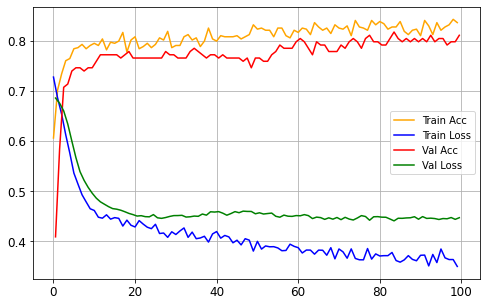

In [165]:
plot_history(history)

In [166]:
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Test loss: 0.5406287312507629, Test accuracy: 0.7532467246055603


In [167]:
print(f"Tuned model has the accuracy of: {round(test_accuracy,4)*100}%")

Tuned model has the accuracy of: 75.32%


### Reporting of final results

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



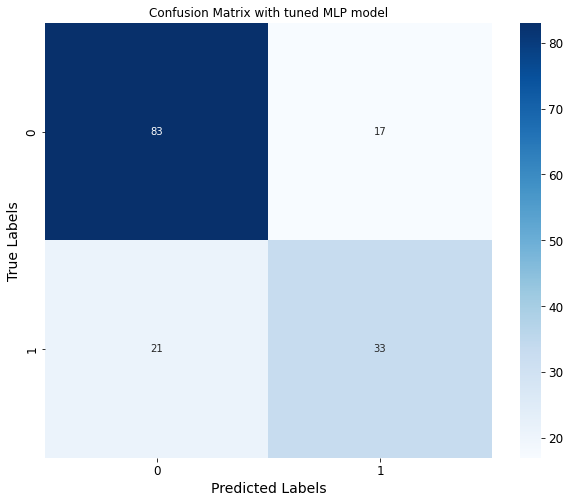

Perceptron Loss: 0.0
Hinge Loss: 0.8961038961038961
Zero-One Loss: 0.24675324675324672


In [168]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hinge_loss
from sklearn.metrics import zero_one_loss
import seaborn as sns

# Predict on the test dataset
y_pred = dnn_model.predict(X_test)

# Define your custom threshold (e.g., 0.6)
custom_threshold = 0.5

# Convert predicted probabilities to class labels using the custom threshold
y_test_pred = np.where(y_pred >= custom_threshold, 1, 0)

print(classification_report(y_test, y_test_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with tuned MLP model")
plt.show()


# Calculate Hinge loss and Zero-One loss
hinge_loss_value = hinge_loss(y_test,y_test_pred)
zero_one_loss_value = zero_one_loss(y_test,y_test_pred)

# Calculate Perceptron loss
perceptron_loss = np.maximum(0, -y_test *y_test_pred).mean()

print("Perceptron Loss:", perceptron_loss)
print("Hinge Loss:", hinge_loss_value)
print("Zero-One Loss:", zero_one_loss_value)


### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82       100
         1.0       0.71      0.46      0.56        54

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



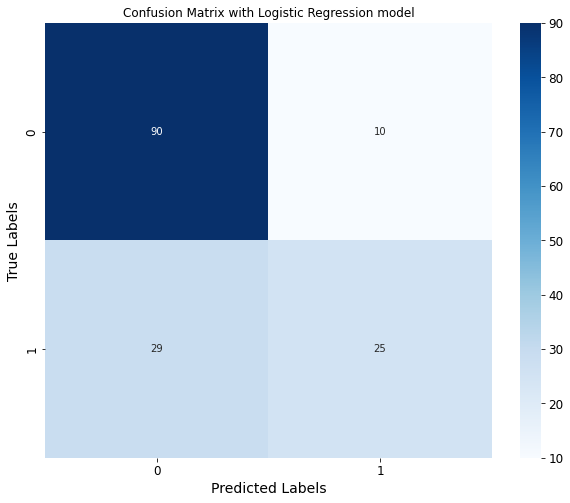

Perceptron Loss: 0.0
Hinge Loss: 0.9025974025974026
Zero-One Loss: 0.2532467532467533


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr= LogisticRegression()
lr.fit(X_train, y_train)

prediction = lr.predict(X_test)
print(classification_report(y_test, prediction))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

# Display confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Logistic Regression model")
plt.show()

# Calculate Hinge loss and Zero-One loss
hinge_loss_value = hinge_loss(y_test,prediction)
zero_one_loss_value = zero_one_loss(y_test,prediction)

# Calculate Perceptron loss
perceptron_loss = np.maximum(0, -y_test *prediction).mean()

print("Perceptron Loss:", perceptron_loss)
print("Hinge Loss:", hinge_loss_value)
print("Zero-One Loss:", zero_one_loss_value)

### SVC model

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       100
         1.0       0.69      0.50      0.58        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



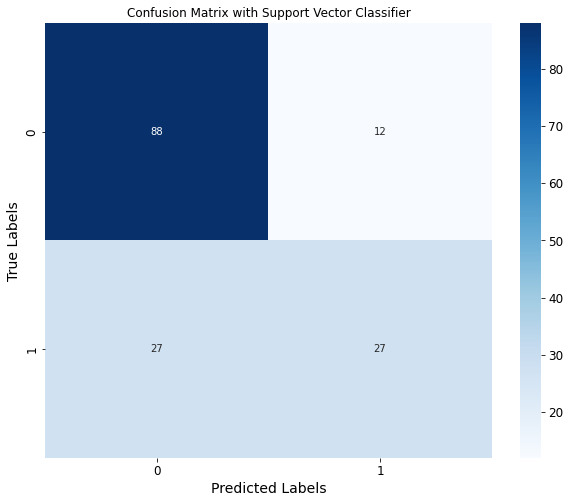

Perceptron Loss: 0.0
Hinge Loss: 0.9025974025974026
Zero-One Loss: 0.2532467532467533


In [96]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an instance of the Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test data
predictions = svc.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with Support Vector Classifier")
plt.show()

# Calculate Hinge loss and Zero-One loss
hinge_loss_value = hinge_loss(y_test,predictions)
zero_one_loss_value = zero_one_loss(y_test,predictions)

# Calculate Perceptron loss
perceptron_loss = np.maximum(0, -y_test *predictions).mean()

print("Perceptron Loss:", perceptron_loss)
print("Hinge Loss:", hinge_loss_value)
print("Zero-One Loss:", zero_one_loss_value)